---
# Global COVID-19 Vaccination Data Analysis and Visualisation
---

## 1. Introduction

The dataset, `country_vaccinations.csv`, that is used in this project can be downloaded from Kaggle via this [link](https://www.kaggle.com/datasets/gpreda/covid-world-vaccination-progress).

The data in the dataset is a comprehensive collection of daily COVID-19 vaccination data by country, gathered from [Our World in Data’s GitHub repository](https://github.com/owid/covid-19-data). Country-level vaccination data is compiled into a single file. This file is then merged with location data files to include vaccination source information before the author uploads it on Kaggle.

The data contains the following information:

| No. | Attribute Name                      | Description                                                                                                            |
|-----|-------------------------------------|------------------------------------------------------------------------------------------------------------------------|
| 1.  | country                             | Country for the vaccination data.                                                                                      |
| 2.  | iso_code                            | ISO code for the country.                                                                                              |
| 3.  | date                                | Date of the data entry.                                                                                                |
| 4.  | total_vaccinations                  | Absolute number of total immunisations.                                                                                |
| 5.  | people_vaccinated                   | Number of people who received at least one dose.                                                                       |
| 6.  | people_fully_vaccinated             | Number of people who received all doses prescribed by the vaccination protocol.                                        |
| 7.  | daily_vaccinations_raw              | Raw number of vaccinations administered for that date. This column will not be used in favour of `daily_vaccinations`. |
| 8.  | daily_vaccinations                  | Number of vaccinations administered for that date.                                                                     |
| 9.  | total_vaccinations_per_hundred      | Ratio (in percent) vaccination number and total population.                                                            |
| 10. | people_vaccinated_per_hundred       | Ratio (in percent) between vaccinated people and total population.                                                     |
| 11. | people_fully_vaccinated_per_hundred | Ratio (in percent) between fully vaccinated people and total population.                                               |
| 12. | daily_vaccinations_per_million      | Ratio (in parts per million) between daily vaccination number and total population.                                    |
| 13. | vaccines                            | Total number of vaccines used in the country.                                                                          |
| 14. | source_name                         | The source of the information.                                                                                         |
| 15. | source_website                      | The website of the information source.                                                                                 |

---
## 2. Setup

In [1]:
# Import necessary libraries
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import seaborn as sns 
import plotly.graph_objects as go
import plotly.express as px
from collections import Counter
import requests

---
## 3. Data Preprocessing

### 3.1 Data Loading

In [3]:
# Load the dataset
try:
    import google.colab # Detect if running in Google Colab
    path = "https://raw.githubusercontent.com/ChokZB/hr_attrition_dashboard/HEAD/data/country_vaccinations.csv"
    # print("Running in Colab → Loaded dataset from GitHub.")
except ImportError:
    path = "data/country_vaccinations.csv"
    # print("Running locally → Loaded dataset from /data folder.")

df = pd.read_csv(path)

### 3.2 Preliminary Data Analysis

#### 3.2.1 Initial Inspection

In [ ]:
# Display the first few rows of the DataFrame to understand its structure
df.head().T

,0,1,2,3,4
country,Afghanistan,Afghanistan,Afghanistan,Afghanistan,Afghanistan
iso_code,AFG,AFG,AFG,AFG,AFG
date,2021-02-22,2021-02-23,2021-02-24,2021-02-25,2021-02-26
total_vaccinations,0.0,NaN,NaN,NaN,NaN
people_vaccinated,0.0,NaN,NaN,NaN,NaN
people_fully_vaccinated,NaN,NaN,NaN,NaN,NaN
daily_vaccinations_raw,NaN,NaN,NaN,NaN,NaN
daily_vaccinations,NaN,1367.0,1367.0,1367.0,1367.0
total_vaccinations_per_hundred,0.0,NaN,NaN,NaN,NaN
people_vaccinated_per_hundred,0.0,NaN,NaN,NaN,NaN


In [ ]:
# Display the shape of the DataFrame to understand its dimensions
df.shape

(86512, 15)

#### 3.2.2 Data Summary

In [ ]:
# Display a concise summary of the DataFrame, including the number of non-null values in each column
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 86512 entries, 0 to 86511
Data columns (total 15 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   country                              86512 non-null  object 
 1   iso_code                             86512 non-null  object 
 2   date                                 86512 non-null  object 
 3   total_vaccinations                   43607 non-null  float64
 4   people_vaccinated                    41294 non-null  float64
 5   people_fully_vaccinated              38802 non-null  float64
 6   daily_vaccinations_raw               35362 non-null  float64
 7   daily_vaccinations                   86213 non-null  float64
 8   total_vaccinations_per_hundred       43607 non-null  float64
 9   people_vaccinated_per_hundred        41294 non-null  float64
 10  people_fully_vaccinated_per_hundred  38802 non-null  float64
 11  daily_vaccinations_per_milli

**Note:** The data type (`Dtype`) of the `date` column is listed as `object`, indicating that the date information is stored as strings rather than datetime objects. To work effectively with date and time data in pandas, converting these strings to datetime objects is necessary. It will be done in `3.3.3 Correcting Data Types`.

In [ ]:
# Summarising the dataset for an overview of the data types and missing values
summary = df.describe(include='all').transpose()
missing_values = df.isnull().sum()

# Combine the summary and missing values information
summary['missing_values'] = missing_values

summary

,count,unique,top,freq,mean,std,min,25%,50%,75%,max,missing_values
country,86512,223,Norway,482,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
iso_code,86512,223,NOR,482,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
date,86512,483,2021-08-19,220,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
total_vaccinations,43607.0,NaN,NaN,NaN,45929644.638728,224600360.181667,0.0,526410.0,3590096.0,17012303.5,3263129000.0,42905
people_vaccinated,41294.0,NaN,NaN,NaN,17705077.7898,70787311.500476,0.0,349464.25,2187310.5,9152519.75,1275541000.0,45218
people_fully_vaccinated,38802.0,NaN,NaN,NaN,14138299.848152,57139201.719159,1.0,243962.25,1722140.5,7559869.5,1240777000.0,47710
daily_vaccinations_raw,35362.0,NaN,NaN,NaN,270599.578248,1212426.601954,0.0,4668.0,25309.0,123492.5,24741000.0,51150
daily_vaccinations,86213.0,NaN,NaN,NaN,131305.486075,768238.773293,0.0,900.0,7343.0,44098.0,22424286.0,299
total_vaccinations_per_hundred,43607.0,NaN,NaN,NaN,80.188543,67.913577,0.0,16.05,67.52,132.735,345.37,42905
people_vaccinated_per_hundred,41294.0,NaN,NaN,NaN,40.927317,29.290759,0.0,11.37,41.435,67.91,124.76,45218


### 3.3 Data Cleaning

#### 3.3.1 Handling Missing Values

In [ ]:
# Filling 'daily_vaccinations' missing values with 0
df['daily_vaccinations'] = df['daily_vaccinations'].fillna(0)

**Note:** It is assumed that if there is no recorded data for `Daily Vaccinations` on a given day, then no vaccinations took place, hence the filling of missing values with `0`. This approach prevents any distortion in daily vaccination trends and allows for accurate calculations of daily averages or totals.

#### 3.3.2 Removing Unwanted Columns

In [ ]:
# Dropping 'daily_vaccinations_raw' column
df.drop(columns=['daily_vaccinations_raw'], inplace=True)

The dataset's author suggested to use `daily_vaccinations` column instead of `daily_vaccinations_raw` column.

#### 3.3.3 Removing Duplicated Rows

In [ ]:
# Before removing duplicates, store the initial number of rows
initial_row_count = df.shape[0]

# Remove duplicate rows
df.drop_duplicates(inplace=True)

# Calculate the number of rows dropped
rows_dropped = initial_row_count - df.shape[0]

# Print out the number of rows dropped
print(f"{rows_dropped} rows have been dropped due to duplication.")

0 rows have been dropped due to duplication.


#### 3.3.3 Correcting Data Types

In [ ]:
# Convert 'date' column to datetime format
df['date'] = pd.to_datetime(df['date'])

### 3.4 Data Preparation

#### 3.4.1 Forward Filling for Cumulative Columns

In [ ]:
# Defining cumulative columns that need forward filling
cumulative_columns = ['total_vaccinations', 'people_vaccinated', 'people_fully_vaccinated', 
                      'total_vaccinations_per_hundred', 'people_vaccinated_per_hundred', 
                      'people_fully_vaccinated_per_hundred', 'daily_vaccinations_per_million']

# Applying forward fill to each cumulative column within each group of 'country'
for column in cumulative_columns:
    # First, forward fill within each group
    df[column] = df.groupby('country')[column].transform(lambda x: x.ffill())
    
    # Then, fill remaining NaN values with 0, addressing initial NaN values in each group
    df[column] = df[column].fillna(0)


- These columns are cumulative, meaning each value is supposed to build on or remain the same as the previous day's total. Missing values could indicate that no update was provided for that day, not necessarily that the cumulative total should revert to zero or remain undefined.

- By using forward filling, each missing value is filled with the last available non-null value preceding it. This method is appropriate for cumulative data because if no new vaccinations were reported on a given day (resulting in a missing value), it is logical to assume the total vaccinations remained the same as the last reported day.

#### 3.4.2 Renaming Columns for Better Readability

In [ ]:
# Renaming columns for better readability
df.rename(columns={
    'country': 'Country',
    'iso_code': 'ISO_Code',
    'date': 'Date',
    'total_vaccinations': 'Total Number of Vaccinations',
    'people_vaccinated': 'Total Number of People Vaccinated',
    'people_fully_vaccinated': 'Total Number of People Fully Vaccinated',
    'daily_vaccinations': 'Daily Vaccinations',
    'total_vaccinations_per_hundred': 'Total Number of Vaccinations per Hundred',
    'people_vaccinated_per_hundred': 'Total Number of People Vaccinated per Hundred',
    'people_fully_vaccinated_per_hundred': 'Total Number of People Fully Vaccinated per Hundred',
    'daily_vaccinations_per_million': 'Daily Vaccinations per Million',
    'vaccines': 'Vaccines Used in the Country',
    'source_name': 'Source Name',
    'source_website': 'Source Website'
}, inplace=True)

### 3.5 Final Inspection

In [ ]:
# Display the first few rows of the DataFrame to understand its structure
df.head().T

,0,1,2,3,4
Country,Afghanistan,Afghanistan,Afghanistan,Afghanistan,Afghanistan
ISO_Code,AFG,AFG,AFG,AFG,AFG
Date,2021-02-22 00:00:00,2021-02-23 00:00:00,2021-02-24 00:00:00,2021-02-25 00:00:00,2021-02-26 00:00:00
Total Number of Vaccinations,0.0,0.0,0.0,0.0,0.0
Total Number of People Vaccinated,0.0,0.0,0.0,0.0,0.0
Total Number of People Fully Vaccinated,0.0,0.0,0.0,0.0,0.0
Daily Vaccinations,0.0,1367.0,1367.0,1367.0,1367.0
Total Number of Vaccinations per Hundred,0.0,0.0,0.0,0.0,0.0
Total Number of People Vaccinated per Hundred,0.0,0.0,0.0,0.0,0.0
Total Number of People Fully Vaccinated per Hundred,0.0,0.0,0.0,0.0,0.0


In [ ]:
# Display the shape of the DataFrame to understand its dimensions
df.shape

(86512, 14)

In [ ]:
# Display a concise summary of the DataFrame, including the number of non-null values in each column
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 86512 entries, 0 to 86511
Data columns (total 14 columns):
 #   Column                                               Non-Null Count  Dtype         
---  ------                                               --------------  -----         
 0   Country                                              86512 non-null  object        
 1   ISO_Code                                             86512 non-null  object        
 2   Date                                                 86512 non-null  datetime64[ns]
 3   Total Number of Vaccinations                         86512 non-null  float64       
 4   Total Number of People Vaccinated                    86512 non-null  float64       
 5   Total Number of People Fully Vaccinated              86512 non-null  float64       
 6   Daily Vaccinations                                   86512 non-null  float64       
 7   Total Number of Vaccinations per Hundred             86512 non-null  float64       
 

In [ ]:
# Summarising the dataset for an overview of the data types and missing values
summary = df.describe(include='all').transpose()
missing_values = df.isnull().sum()

# Combine the summary and missing values information
summary['missing_values'] = missing_values

summary

,count,unique,top,freq,mean,min,25%,50%,75%,max,std,missing_values
Country,86512,223,Norway,482,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
ISO_Code,86512,223,NOR,482,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
Date,86512,NaN,NaN,NaN,2021-09-01 17:09:45.907157504,2020-12-02 00:00:00,2021-05-27 00:00:00,2021-09-04 00:00:00,2021-12-12 00:00:00,2022-03-29 00:00:00,NaN,0
Total Number of Vaccinations,86512.0,NaN,NaN,NaN,25895019.857303,0.0,117984.0,1079839.5,8265793.0,3263129000.0,161474777.201555,0
Total Number of People Vaccinated,86512.0,NaN,NaN,NaN,13304779.069355,0.0,73735.0,680630.0,4441924.0,1275541000.0,77714448.66618,0
Total Number of People Fully Vaccinated,86512.0,NaN,NaN,NaN,10000809.973056,0.0,22546.0,344063.0,3146539.0,1240777000.0,65886613.69742,0
Daily Vaccinations,86512.0,NaN,NaN,NaN,130851.672265,0.0,877.0,7245.0,43704.5,22424286.0,766948.742508,0
Total Number of Vaccinations per Hundred,86512.0,NaN,NaN,NaN,67.115687,0.0,6.93,47.36,118.3625,345.37,65.232437,0
Total Number of People Vaccinated per Hundred,86512.0,NaN,NaN,NaN,34.874463,0.0,4.97,29.69,62.75,124.76,29.544334,0
Total Number of People Fully Vaccinated per Hundred,86512.0,NaN,NaN,NaN,27.606726,0.0,1.38,16.77,53.13,122.37,28.203818,0


---
## 4. Exploratory Data Analysis (EDA)

### 4.1 Top / Bottom 10 Countries by Vaccination Rate

In [ ]:
# Custom color scale for the charts
color_scale_top = [[0, 'rgb(119, 171, 143)'], [0.5, 'rgb(61, 120, 102)'], [1, 'rgb(25, 60, 62)']] 
color_scale_bottom = [[0, 'rgb(255, 237, 160)'], [0.5, 'rgb(254, 178, 76)'], [1, 'rgb(240, 59, 32)']] 

# Get the most recent entry for each country
most_recent_data = df.sort_values(by=['Country', 'Date']).drop_duplicates('Country', keep='last')

# Using "Total Number of People Fully Vaccinated per Hundred" as the metric
# Calculate highest and lowest vaccination rates using nlargest and nsmallest methods
highest_vaccination_rates = most_recent_data.nlargest(10, 'Total Number of People Fully Vaccinated per Hundred')
lowest_vaccination_rates = most_recent_data.nsmallest(10, 'Total Number of People Fully Vaccinated per Hundred')

#### 4.1.1 Top 10 Countries by Vaccination Rate

In [ ]:
# Highest vaccination rates
fig = go.Figure(go.Bar(
    x=highest_vaccination_rates['Total Number of People Fully Vaccinated per Hundred'],
    y=highest_vaccination_rates['Country'],
    orientation='h', # Horizontal bar chart
    marker={
        'color': highest_vaccination_rates['Total Number of People Fully Vaccinated per Hundred'],
        'coloraxis': 'coloraxis' # Color bars based on vaccination rate
    } 
))

# Customize the chart layout
fig.update_layout(
    title={
        'text': 'Top 10 Countries by Vaccination Rate (People Fully Vaccinated per Hundred)',
        'x': 0.5,  # Center the title horizontally
        'xanchor': 'center',  # Ensure the centering is based on the middle of the text
        'font': {
            'size': 20 # Title font size
        }  
    },
    xaxis={
        'title': 'Total Number of People Fully Vaccinated per Hundred',
        'title_font_size': 16,  # X-axis title font size
        'tickfont_size': 14  # X-axis tick font size
    },
    yaxis={
        'title': 'Country',
        'title_font_size': 16,  # Y-axis title font size
        'tickfont_size': 14,  # Y-axis tick font size
        'autorange': "reversed" # Countries ordered from highest vaccination rate at the top
    },
    coloraxis={
        'colorscale': color_scale_top,
        'colorbar': {
            'title': 'Vaccination Rate'
        }
    },
    height=600,
    width=1200
)

fig.show()

#### 4.1.2 Bottom 10 Countries by Vaccination Rate

In [ ]:
# Lowest vaccination rates
fig = go.Figure(go.Bar(
    x=lowest_vaccination_rates['Total Number of People Fully Vaccinated per Hundred'],
    y=lowest_vaccination_rates['Country'],
    orientation='h', # Horizontal bar chart
    marker={
        'color': lowest_vaccination_rates['Total Number of People Fully Vaccinated per Hundred'],
        'coloraxis': 'coloraxis' # Color bars based on vaccination rate
    } 
))

fig.update_layout(
    title={
        'text': 'Bottom 10 Countries by Vaccination Rate (People Fully Vaccinated per Hundred)',
        'x': 0.5,  # Center the title horizontally
        'xanchor': 'center',  # Ensure the centering is based on the middle of the text
        'font': {
            'size': 20 # Title font size
        }  
    },
    xaxis={
        'title': 'Total Number of People Fully Vaccinated per Hundred',
        'title_font_size': 16,  # X-axis title font size
        'tickfont_size': 14  # X-axis tick font size
    },
    yaxis={
        'title': 'Country',
        'title_font_size': 16,  # Y-axis title font size
        'tickfont_size': 14  # Y-axis tick font size
    },
    coloraxis={
        'colorscale': color_scale_bottom,
        'colorbar': {
            'title': 'Vaccination Rate'
        }
    },
    height=600,
    width=1200
)

fig.show()

#### 4.1.3 Vaccination Rate of World's Most Populous Countries

In [ ]:
# Custom color scale for the charts
color_scale = [[0, 'rgb(192, 219, 236)'], [0.5, 'rgb(108, 152, 183)'], [1, 'rgb(53, 92, 125)']] 

# Filter the dataframe to include only the desired countries
filtered_data = df[df['Country'].isin(['United States', 'China', 'India'])]

# Get most recent data
filtered_most_recent_data = filtered_data.sort_values(by=['Country', 'Date']).drop_duplicates('Country', keep='last').sort_values(by='Total Number of People Fully Vaccinated per Hundred', ascending=False)

# Create a horizontal bar chart
fig = go.Figure(go.Bar(
    x=filtered_most_recent_data['Total Number of People Fully Vaccinated per Hundred'],
    y=filtered_most_recent_data['Country'],
    orientation='h', # Horizontal bar chart
    marker={
        'color': filtered_most_recent_data['Total Number of People Fully Vaccinated per Hundred'],
        'coloraxis': 'coloraxis' # Color bars based on vaccination rate
    } 
))

# Customize the chart layout
fig.update_layout(
    title={
        'text': 'Vaccination Rate of US, China, India (People Fully Vaccinated per Hundred)',
        'x': 0.5,  # Center the title horizontally
        'xanchor': 'center',  # Ensure the centering is based on the middle of the text
        'font': {
            'size': 20 # Title font size
        }  
    },
    xaxis={
        'title': 'Total Number of People Fully Vaccinated per Hundred',
        'title_font_size': 16,  # X-axis title font size
        'tickfont_size': 14  # X-axis tick font size
    },
    yaxis={
        'title': 'Country',
        'title_font_size': 16,  # Y-axis title font size
        'tickfont_size': 14,  # Y-axis tick font size
        'autorange': "reversed" # Countries ordered from highest vaccination rate at the top
    },
    coloraxis={
        'colorscale': color_scale,
        'colorbar': {
            'title': 'Vaccination Rate'
        }
    },
    height=400,
    width=1200
)


fig.show()

---
### 4.2 Global Usage of Different Vaccines

In [ ]:
# Splitting the 'vaccines' column to count the occurrences of each vaccine across all countries
vaccine_counts = Counter(df['Vaccines Used in the Country'].str.split(', ').explode())

# Creating a dataframe for vaccine counts for easier visualisation
vaccine_counts_df = pd.DataFrame(vaccine_counts.items(), columns=['Vaccine', 'Count']).sort_values(by='Count', ascending=False)

# Create a horizontal bar chart
fig = go.Figure(go.Bar(
    x=vaccine_counts_df['Count'],
    y=vaccine_counts_df['Vaccine'],
    orientation='h', # Horizontal bar chart
    marker={
        'color': vaccine_counts_df['Count'], # Color bars based on count
        'coloraxis': 'coloraxis' 
    } 
))

# Customize the chart layout
fig.update_layout(
    title={
        'text': 'Global Usage of Different Vaccines',
        'x': 0.5,  # Center the title horizontally
        'xanchor': 'center',  # Ensure the centering is based on the middle of the text
        'font': {
            'size': 18 # Title font size
        }  
    },
    xaxis={
        'title': 'Number of Records',
        'title_font_size': 14,  # X-axis title font size
        'tickfont_size': 12  # X-axis tick font size
    },
    yaxis={
        'title': 'Vaccine',
        'title_font_size': 14,  # Y-axis title font size
        'tickfont_size': 12,  # Y-axis tick font size
        'autorange': "reversed" # Countries ordered from highest vaccination rate at the top
    },
    coloraxis={
        'colorscale': color_scale,
        'colorbar': {
            'title': 'Vaccine Usage'
        }
    },
    height=600,
    width=1200
)


fig.show()

---
### 4.3 Global Daily Vaccinations Over Time

In [ ]:
# Custom color for the charts
color = 'rgb(108, 152, 183)'

# Calculate the sum of daily vaccinations globally for each date
global_daily_vaccinations = df.groupby('Date')['Daily Vaccinations'].sum()

# Find the date with the maximum daily vaccinations
max_vaccinations_date = global_daily_vaccinations.idxmax()

# Format the maximum daily vaccinations with thousand separators
max_vaccinations = f"{global_daily_vaccinations.max():,}".split('.')[0]

# Create a plot with daily vaccinations over time
fig = go.Figure(go.Scatter(
    x=global_daily_vaccinations.index, 
    y=global_daily_vaccinations.values,
    mode='lines', 
    line={
        'color': color, 
        'width': 2.5
    }
))

# Add annotation for the maximum daily vaccinations date
fig.add_annotation(
    x=max_vaccinations_date, 
    y=global_daily_vaccinations.max(),
    text=f'{max_vaccinations_date.strftime("%Y-%m-%d")}\n{max_vaccinations}',
    showarrow=True, 
    arrowhead=0, 
    arrowsize=1, 
    arrowwidth=1,
    arrowcolor='red', 
    font={
        'color': 'red'
    },
    ax=-40, 
    ay=-40
)

# Add a marker for the maximum daily vaccinations
fig.add_trace(go.Scatter(
    x=[max_vaccinations_date], 
    y=[global_daily_vaccinations.max()],
    mode='markers', 
    marker={
        'color': 'red', 
        'size': 8
    }
))

# Update layout of the plot
fig.update_layout(
    title={
        'text': 'Global Daily Vaccinations Over Time',
        'x': 0.5,  # Center the title horizontally
        'xanchor': 'center',  # Ensure the centering is based on the middle of the text
        'font': {
            'size': 20 # Title font size
        }  
    },
    xaxis={
        'title': 'Date',
        'title_font_size': 14,  # X-axis title font size
        'tickfont_size': 12,  # X-axis tick font size
        'tickformat': '%Y-%m-%d',
        'tickmode': 'auto',
        'tickangle': -45
    },
    yaxis={
        'title': 'Total Daily Vaccinations (Global)',
        'title_font_size': 14,  # Y-axis title font size
        'tickfont_size': 12,  # Y-axis tick font size
        'tickformat': ','
    },
    template='plotly_white',
    height=600,
    width=1200,
    showlegend=False
)

# Show the plot
fig.show()

---
### 4.4 Average Total Vaccinations per Hundred by World Bank Income Level

In [ ]:
# Function to fetch income level data from the World Bank API
def fetch_income_levels():
    url = "http://api.worldbank.org/v2/country/all?format=json&per_page=300"
    response = requests.get(url)
    countries_data = response.json()[1]  # The actual data is usually in the second item
    
    # Extract country codes and their income levels, excluding 'Not classified'
    country_income_level = {
        country['id']: country['incomeLevel']['value']
        for country in countries_data if country['incomeLevel']['id'] != "NA" and country['incomeLevel']['value'] != 'Not classified'
    }
    return country_income_level

country_income_level = fetch_income_levels()

# Map income level information to the dataset based on ISO codes
df['Income Level'] = df['ISO_Code'].map(country_income_level)

# Define and map the order for sorting by income level
income_level_order = {
    'Low income': 1,
    'Lower middle income': 2,
    'Upper middle income': 3,
    'High income': 4
}
df['Income Level Order'] = df['Income Level'].map(income_level_order)

# Filter data to include only countries with known income levels and take the latest data per country
latest_data_per_country = df[df['Income Level'].notnull()].sort_values('Date').groupby('Country').last()

# Calculate average vaccinations per hundred by income level and sort
average_vaccinations_per_hundred = latest_data_per_country.groupby('Income Level')['Total Number of Vaccinations per Hundred'].mean().reindex(['Low income', 'Lower middle income', 'Upper middle income', 'High income'])

In [ ]:
# Custom color for the charts
colors = ['#c0dbec', '#96b9d2', '#6c98b7', '#355c7d']

# Generate visualization
labels = average_vaccinations_per_hundred.index
values = average_vaccinations_per_hundred.values

fig = go.Figure()

for i, label in enumerate(labels):
    fig.add_trace(go.Bar(
        x=[label],
        y=[values[i]],
        marker_color=colors[i],
        marker_line_color='grey',
        marker_line_width=1.5,
        name=label,
        width=0.8
    ))

fig.update_layout(
    title={
        'text': 'Average Total Vaccinations per Hundred by Income Level',
        'x': 0.5,  
        'xanchor': 'center',
        'font': {
            'size': 20
        }
    },
    xaxis={
        'title': 'Income Level',
        'title_font_size': 18,
        'tickfont_size': 16,
    },
    yaxis={
        'title': 'Average Total Vaccinations per Hundred',
        'title_font_size': 18,
        'tickfont_size': 16,
        'gridcolor': 'lightgrey',
        'gridwidth': 0.5,
        'linecolor': 'grey',
    },
    plot_bgcolor='white',
    margin={'l': 20, 'r': 20, 't': 40, 'b': 20},
    height=600,
    width=1200
)

# Add value labels to each bar
for i, value in enumerate(values):
    fig.add_annotation(
        x=labels[i],
        y=value,
        text=str(round(value, 2)),
        showarrow=False,
        yshift=10,
        font={
            'size': 14
        }
    )

fig.show()

---
### 4.5 Correlation between Number of Vaccines Used and Vaccination Coverage

In [ ]:
# Aggregating the data
coverage_data = df.groupby('Country')['Total Number of People Fully Vaccinated per Hundred'].max().reset_index()

# Getting vaccine types used by each country
vaccines_used = df[['Country', 'Vaccines Used in the Country']].drop_duplicates()

# Merging the datasets
merged_data = pd.merge(coverage_data, vaccines_used, on='Country')

# Adding a column for the number of vaccines used
merged_data['Number of Vaccines Used'] = merged_data['Vaccines Used in the Country'].apply(lambda x: len(x.split(',')))

In [ ]:
# Define color hex codes for custom color scale
colors = ["#c0dbec", "#6c98b7", "#355c7d"]

# Create a custom color scale by mapping each color to its relative position
color_scale = [(i / (len(colors) - 1), color) for i, color in enumerate(colors)]

# Create the scatter plot with a custom color scale
fig = px.scatter(
    merged_data,
    x='Number of Vaccines Used',  
    y='Total Number of People Fully Vaccinated per Hundred',  
    color='Number of Vaccines Used',  
    color_continuous_scale=color_scale,  
    title='Correlation between Number of Vaccines Used and Vaccination Coverage'  
)

# Update layout for aesthetics and readability
fig.update_layout(
    title={
        'text': 'Correlation between Number of Vaccines Used and Vaccination Coverage',  
        'x': 0.5,  
        'xanchor': 'center',  
        'font': {
            'size': 20
        }  
    },
    xaxis={
        'title': 'Number of Vaccines Used',  
        'title_font_size': 16,  
        'tickfont_size': 14,  
        'showgrid': True,  
        'gridwidth': 0.5,  
        'gridcolor': 'lightgrey'  
    },
    yaxis={
        'title': 'Total Number of People Fully Vaccinated per Hundred', 
        'title_font_size': 16,  
        'tickfont_size': 14,  
        'showgrid': True,  
        'gridcolor': 'lightgrey',  
        'gridwidth': 0.5,  
        'linecolor': 'grey'  
    },
    plot_bgcolor='white',  
    height=600,
    width=1200
)

# Display the figure
fig.show()


---
### 4.6 Total Vaccinations per Hundred by Population Category

In [ ]:
# This block of codes will take several minutes to run

def get_population_by_country(country_name, population_dict):
    """Fetch population data for a given country using the REST Countries API, with caching."""
    if country_name in population_dict:
        return population_dict[country_name]  # Return cached value if available
    
    try:
        url = f"https://restcountries.com/v3.1/name/{country_name}"
        response = requests.get(url)
        response.raise_for_status()  # This will raise an exception for HTTP errors
        data = response.json()
        population = data[0]['population']
        population_dict[country_name] = population  # Cache this population data
        return population
    except requests.RequestException as e:
        print(f"Request failed for {country_name}: {e}")
        return None
    
# Initialize a dictionary to cache population data
population_dict = {}

# Aggregate the latest total number of vaccinations per hundred for each country
latest_vaccinations_per_hundred = df.groupby('Country')['Total Number of Vaccinations per Hundred'].last().reset_index()

# Add population data from the REST Countries API
latest_vaccinations_per_hundred['Population'] = latest_vaccinations_per_hundred['Country'].apply(lambda x: get_population_by_country(x, population_dict))

# Categorize countries based on population
def categorize_population(population):
    if population <= 10_000_000:
        return 'Small'
    elif population <= 100_000_000:
        return 'Medium'
    else:
        return 'Large'

latest_vaccinations_per_hundred['Population Category'] = latest_vaccinations_per_hundred['Population'].apply(categorize_population)

Request failed for Bonaire Sint Eustatius and Saba: 404 Client Error: Not Found for url: https://restcountries.com/v3.1/name/Bonaire%20Sint%20Eustatius%20and%20Saba
Request failed for Cote d'Ivoire: 404 Client Error: Not Found for url: https://restcountries.com/v3.1/name/Cote%20d'Ivoire
Request failed for Democratic Republic of Congo: 404 Client Error: Not Found for url: https://restcountries.com/v3.1/name/Democratic%20Republic%20of%20Congo
Request failed for England: 404 Client Error: Not Found for url: https://restcountries.com/v3.1/name/England
Request failed for Faeroe Islands: 404 Client Error: Not Found for url: https://restcountries.com/v3.1/name/Faeroe%20Islands
Request failed for Northern Cyprus: 404 Client Error: Not Found for url: https://restcountries.com/v3.1/name/Northern%20Cyprus
Request failed for Scotland: 404 Client Error: Not Found for url: https://restcountries.com/v3.1/name/Scotland
Request failed for Wales: 404 Client Error: Not Found for url: https://restcountrie

In [ ]:
fig = px.box(latest_vaccinations_per_hundred, 
             x='Population Category', 
             y='Total Number of Vaccinations per Hundred', 
             category_orders={'Population Category': ['Small', 'Medium', 'Large']},
             color='Population Category',  # Assigning color based on Population Category
             color_discrete_sequence=['rgb(192, 219, 236)', 'rgb(108, 152, 183)', 'rgb(53, 92, 125)'])

fig.update_layout(
    title={
        'text': 'Total Vaccinations per Hundred by Population Category',
        'x': 0.5,  
        'xanchor': 'center',
        'font': {
            'size': 20
        }
    },
    xaxis={
        'title': 'Population Category',
        'title_font_size': 18,
        'tickfont_size': 16,
        'showgrid': True, 
        'gridwidth': 0.5, 
        'gridcolor': 'LightGrey'
    },
    yaxis={
        'title': 'Total Vaccinations per Hundred',
        'title_font_size': 18,
        'tickfont_size': 16,
        'showgrid': True, 
        'gridwidth': 0.5,
        'gridcolor': 'lightgrey',
    },
    plot_bgcolor='white',  
    height=600,
    width=1200
)


fig.show()


---
### 4.7 Correlation Matrix of Numerical Variables

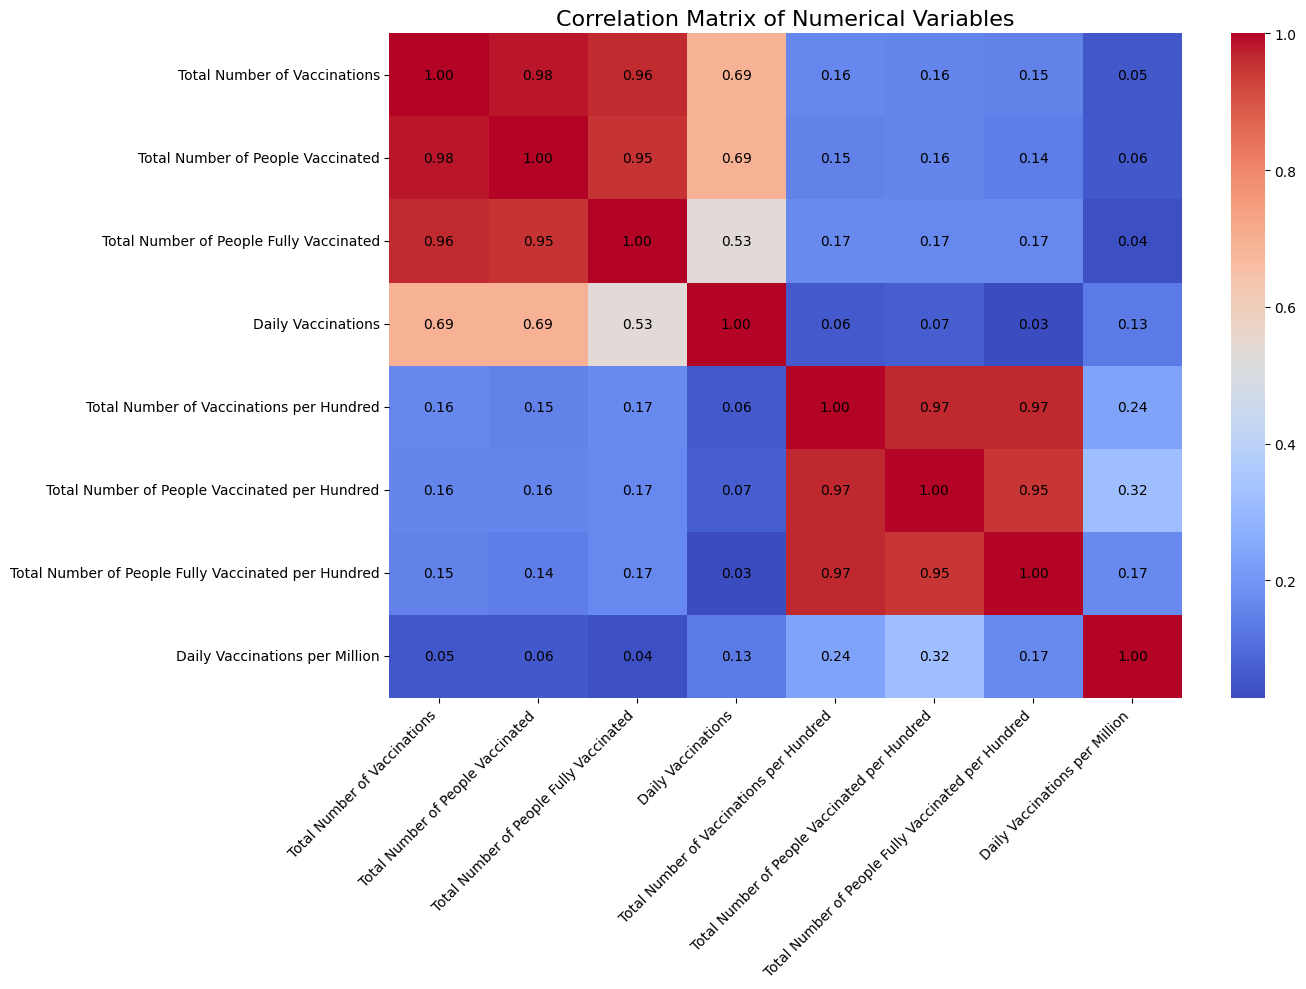

In [ ]:
# Selecting numerical columns for correlation analysis
numerical_columns_for_corr = [
    'Total Number of Vaccinations', 
    'Total Number of People Vaccinated', 
    'Total Number of People Fully Vaccinated', 
    'Daily Vaccinations',
    'Total Number of Vaccinations per Hundred', 
    'Total Number of People Vaccinated per Hundred',
    'Total Number of People Fully Vaccinated per Hundred', 
    'Daily Vaccinations per Million'
]

# Calculating the correlation matrix
correlation_matrix = df[numerical_columns_for_corr].corr()

# Plotting the correlation matrix using a heatmap with UI enhancements
plt.figure(figsize=(14, 10))  # Adjusted figure size
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", annot_kws={"size": 10, "color": "black"})
plt.title('Correlation Matrix of Numerical Variables', fontsize=16)
plt.xticks(rotation=45, ha="right")  # Rotate the x-axis labels for better readability
plt.yticks(rotation=0)  # Ensure y-axis labels are horizontal for readability
plt.tight_layout()  # Adjust layout to make room for the rotated x-axis labels
plt.show()